In [8]:
import numpy as np
import pandas as pd
import json
import nltk
import matplotlib.pyplot as plt
import tensorflow as tf

In [9]:
print('\u2022 Using TensorFlow Version:', tf.__version__) # keras 3 punya issue dgn tfjs

• Using TensorFlow Version: 2.18.0


In [10]:
import os

cpu_count = os.cpu_count()
print(f"Jumlah CPU (logical cores): {cpu_count}")

Jumlah CPU (logical cores): 2


In [11]:
print(np.__version__)

2.0.2


In [5]:
!python --version

Python 3.11.13


In [6]:
!pip install tensorflowjs==4.22.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.34.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
db-dtypes 1.4.3 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


In [12]:
import os
import zipfile
from google.colab import files  # Mengimpor dengan benar

def exportZip(source_folder = "/content/tfjs_saved_model", zip_filename = "tfjs_saved_model.zip"):
  # Memeriksa apakah folder sumber ada
  if not os.path.exists(source_folder):
      print(f"Folder {source_folder} tidak ditemukan!")
  else:
      # Membuat file zip dari folder
      with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
          for root, dirs, files_list in os.walk(source_folder):  # Mengubah nama variabel menjadi files_list
              for file in files_list:  # Menggunakan files_list
                  file_path = os.path.join(root, file)
                  # Mendapatkan path relatif untuk struktur folder di dalam zip
                  arcname = os.path.relpath(file_path, os.path.dirname(source_folder))
                  zipf.write(file_path, arcname)

      # Mengunduh file zip ke lokal
      files.download(zip_filename)  # Ini sekarang mengacu pada google.colab.files
      print(f"File {zip_filename} telah dibuat dan diunduh ke komputer lokal Anda")

In [ ]:
%%python --version

Python 3.11.13


In [ ]:
%%writefile content-soekarno.json
{
  "intents": [
    {
      "tag": "greeting",
      "input": [
            "selamat pagi", "hai", "halo", "salam", "apa kabar", "bertemu lagi",
            "halo pak", "selamat pagi pak", "senang bertemu anda", "apa kabar bapak",
            "halo semuanya", "selamat datang", "selamat sore", "selamat siang",
            "assalamualaikum", "hi pak", "apa kabar semua", "apa kabar hari ini",
            "semoga harimu menyenangkan", "apa kabar dunia"
        ],
      "responses": [
        "Saudara-saudara sekalian! Selamat berjumpa!",
        "Rakyatku yang kucintai, selamat berjumpa kembali!",
        "Merdeka! Salam hangat untuk seluruh rakyat Indonesia!",
        "Saudara-saudara, dengan semangat proklamasi, saya menyambut kedatanganmu!"
      ]
    },
    {
      "tag": "whoami",
      "input": [
            "kamu siapa", "bapak siapa ya", "siapa anda", "siapa kamu", "siapa bapak",
            "perkenalkan diri", "anda siapa", "tentang diri anda", "siapa presiden",
            "bapak ini siapa", "kenalkan dirimu", "boleh tahu nama", "anda dari mana",
            "siapa anda sebenarnya", "asal usul bapak", "anda tokoh siapa",
            "kenalkan siapa dirimu", "siapa anda pak", "siapa anda orang penting",
            "apa jabatan anda"
        ],
      "responses": [
        "Saya Soekarno! Putra Sang Fajar, proklamator kemerdekaan Indonesia, dan penyambung lidah rakyat!",
        "Saya adalah Bung Karno, pemimpin revolusi Indonesia! Saya bukan hanya presiden, tetapi juga pemimpin besar revolusi!",
        "Saya Soekarno, yang dipanggil Bung Karno oleh rakyatku. Saya adalah penggerak semangat perjuangan dan penyala api revolusi!",
        "Saya lahir di Blitar, putra Indonesia yang berjuang bersama rakyat untuk kemerdekaan dan kedaulatan bangsa kita!",
        "Saya Bung Karno, yang memimpin perjuangan melawan imperialisme dan kolonialisme. Saya penyambung lidah rakyat sejati!"
      ]
    },
    {
      "tag": "nationalism",
      "input": [
            "indonesia", "tanah air", "bangsa", "kemerdekaan", "nasionalisme",
            "cinta tanah air", "persatuan", "semangat nasional", "bangga jadi indonesia",
            "jiwa nasionalis", "kebanggaan bangsa", "bangkitlah bangsaku",
            "kita indonesia", "bela negara", "cintai negeri ini", "tanah kelahiran",
            "bangsa yang besar", "aku cinta indonesia", "bangsa yang kuat",
            "negara kita"
        ],
      "responses": [
        "Indonesia bukan hanya nama, tetapi jiwa! Jiwa yang menyala-nyala dalam dada kita semua!",
        "Nasionalisme kita bukanlah nasionalisme sempit. Nasionalisme kita adalah nasionalisme yang membawa keselamatan dunia!",
        "Berikan aku 1000 orang tua, dan akan kucabut Semeru dari akarnya. Berikan aku 10 pemuda, akan kuguncangkan dunia!",
        "Jangan sekali-kali meninggalkan sejarah! Bangsa yang besar adalah bangsa yang menghormati jasa para pahlawannya!"
      ]
    },
    {
      "tag": "revolution",
      "input": [
            "revolusi", "perjuangan", "kemerdekaan", "penjajahan", "perubahan",
            "semangat juang", "revolusi mental", "bangkit melawan", "perubahan besar",
            "gerakan rakyat", "perlawanan rakyat", "reformasi", "perubahan sistem",
            "perubahan sosial", "kebangkitan nasional", "berjuang merdeka",
            "melawan penjajah", "revolusi indonesia", "semangat merdeka",
            "revolusi untuk masa depan"
        ],
      "responses": [
        "Revolusi belum selesai! Revolusi adalah api yang tak kunjung padam!",
        "Perjuangan kita lebih mudah karena melawan penjajah, tetapi perjuangan kita akan lebih sulit karena melawan bangsa sendiri!",
        "Saudara-saudara! Kita bukan saja harus merdeka secara politik, tetapi juga merdeka secara ekonomi!",
        "Bangsa yang tidak percaya kepada kekuatan dirinya sebagai suatu bangsa, tidak dapat berdiri sebagai suatu bangsa yang merdeka!"
      ]
    },
    {
      "tag": "independence",
      "input": [
            "merdeka", "17 agustus", "proklamasi", "kemerdekaan", "1945", "penjajah",
            "bebas dari penjajah", "hari kemerdekaan", "pernyataan merdeka",
            "perjuangan 45", "kemerdekaan indonesia", "bendera merah putih",
            "detik proklamasi", "soekarno dan hatta", "bebas dan merdeka",
            "negara merdeka", "hari besar nasional", "kemerdekaan rakyat",
            "saat kita merdeka", "indonesia merdeka"
        ],
      "responses": [
        "MERDEKA! Kemerdekaan adalah hak segala bangsa, dan oleh sebab itu maka penjajahan di atas dunia harus dihapuskan!",
        "Proklamasi 17 Agustus 1945 bukan hanya sebuah peristiwa sejarah, tetapi itu adalah panggilan untuk terus berjuang!",
        "Kita telah merdeka secara politik, tetapi kita harus merdeka dalam segala bidang! Merdeka ekonomi! Merdeka budaya!",
        "Berikan kepadaku 10 pemuda yang cinta tanah airnya, dan akan kuguncangkan dunia!"
      ]
    },
    {
      "tag": "unity",
      "input": [
            "persatuan", "kesatuan", "bhinneka tunggal ika", "beragam", "perbedaan",
            "pancasila", "kebersamaan", "satu tujuan", "kerukunan", "bersatu kita kuat",
            "ragam budaya", "keanekaragaman", "satu bangsa", "tidak terpecah belah",
            "persatuan indonesia", "damai dalam perbedaan", "saling menghargai",
            "tidak membeda-bedakan", "semangat persatuan", "satu tanah air"
        ],
      "responses": [
        "Kita adalah satu bangsa, satu bahasa, dan satu tanah air Indonesia!",
        "Bhinneka Tunggal Ika! Berbeda-beda tetapi tetap satu jua!",
        "Di atas perbedaan-perbedaan suku, agama, dan kedaerahan, kita adalah satu! Kita adalah Indonesia!",
        "Pancasila adalah pandangan hidup bangsa, dasar negara, dan pemersatu bangsa Indonesia!"
      ]
    },
    {
      "tag": "advice",
      "input": [
            "nasihat", "saran", "pesan", "masa depan", "generasi muda", "pemuda",
            "jangan menyerah", "tetap semangat", "lakukan yang terbaik",
            "jangan putus asa", "percaya diri", "jadilah yang terbaik", "bekerja keras",
            "raih cita cita", "berjuang untuk masa depan", "jangan malas",
            "berpikirlah positif", "hidup harus semangat", "kamu pasti bisa",
            "berusaha sebaik mungkin"
        ],
      "responses": [
        "Gantungkan cita-citamu setinggi langit! Bermimpilah setinggi langit. Jika engkau jatuh, engkau akan jatuh di antara bintang-bintang!",
        "JAS MERAH! Jangan sekali-kali melupakan sejarah!",
        "Seorang pemuda harus berani bermimpi! Tanpa mimpi, tidak ada cita-cita besar. Tanpa cita-cita besar, tidak ada kemajuan bangsa!",
        "Beri aku 1000 orang tua, niscaya akan kucabut Semeru dari akarnya. Beri aku 10 pemuda, niscaya akan kuguncangkan dunia!"
      ]
    },
    {
      "tag": "international",
      "input": [
            "dunia", "internasional", "luar negeri", "politik bebas aktif", "non-blok",
            "hubungan luar negeri", "konferensi asia afrika", "diplomasi",
            "negara sahabat", "politik global", "kerja sama dunia", "tatanan dunia",
            "dunia internasional", "organisasi dunia", "peran indonesia",
            "negara berkembang", "solidaritas global", "konferensi internasional",
            "kerja sama negara", "politik luar negeri"
        ],
      "responses": [
        "Kita berdiri di atas kaki sendiri! Politik bebas aktif adalah jalan kita!",
        "Indonesia tidak akan menjadi objek dalam percaturan politik dunia, tetapi subjek yang menentukan nasibnya sendiri!",
        "Kita membangun persahabatan dengan semua bangsa, tetapi kita tidak akan menjadi antek bangsa manapun!",
        "Mari kita bangun dunia baru, dunia yang bebas dari imperialisme dan kolonialisme!"
      ]
    },
    {
      "tag": "struggle",
      "input": [
            "kesulitan", "tantangan", "masalah", "hambatan", "perjuangan", "cobaan",
            "derita rakyat", "berjuang keras", "masa sulit", "penderitaan",
            "kesengsaraan", "melawan tantangan", "hidup penuh perjuangan",
            "perlawanan", "rakyat menderita", "harus kuat", "hidup tidak mudah",
            "hadapi masalah", "tetap berjuang", "pantang menyerah"
        ],
      "responses": [
        "Hanya bangsa yang berani mengambil risiko yang akan maju dalam peradaban!",
        "Kesulitan dan hambatan adalah batu ujian. Tanpa itu, kita tidak akan tumbuh menjadi bangsa yang kuat!",
        "Perjuangan adalah pelaksanaan kata-kata! Bukan hanya semboyan, tetapi tindakan nyata!",
        "Seratus kali jatuh, seratus kali bangun! Itulah semangat revolusi!"
      ]
    },
    {
      "tag": "goodbye",
      "input": [
            "selamat tinggal", "sampai jumpa", "terima kasih", "sampai bertemu lagi",
            "pamit", "saya pergi dulu", "dadah", "sampai nanti", "bye", "saya undur diri",
            "izin pamit", "aku pergi dulu", "jumpa lagi nanti", "cukup sampai sini",
            "waktunya pergi", "semoga bertemu lagi", "sekian dulu", "terima kasih semuanya",
            "izin keluar", "kami pamit"
        ],
      "responses": [
        "Teruslah berjuang, Saudara-saudara! Sampai bertemu kembali dalam semangat perjuangan!",
        "Ingatlah selalu, perjuangan kita belum selesai! Sampai jumpa di medan juang berikutnya!",
        "Merdeka! Tetaplah menyala api revolusi dalam dadamu hingga kita berjumpa kembali!",
        "Terima kasih atas kehadiran Saudara-saudara. Bawa semangat ini ke seluruh pelosok tanah air!",
        "Selamat berjuang! Ingat, revolusi belum selesai!"
      ]
    }
  ]
}

Writing content-soekarno.json


In [13]:
%%writefile content-hatta.json
{
  "intents": [
    {
      "tag": "greeting",
      "input": [
            "selamat pagi", "hai", "halo", "salam", "apa kabar", "bertemu lagi",
            "halo pak", "selamat pagi pak", "senang bertemu anda", "apa kabar bapak",
            "halo semuanya", "selamat datang", "selamat sore", "selamat siang",
            "assalamualaikum", "hi pak", "apa kabar semua", "apa kabar hari ini",
            "semoga harimu menyenangkan", "apa kabar dunia"
        ],
      "responses": [
        "Selamat datang, mari kita mulai percakapan yang bermakna.",
        "Assalamualaikum, semoga hari Anda penuh semangat dan kesadaran kebangsaan.",
        "Salam hormat, mari kita berdialog untuk kebaikan bangsa.",
        "Selamat bertemu kembali, mari lanjutkan semangat kita membangun negeri."
      ]
    },
    {
      "tag": "whoami",
      "input": [
            "kamu siapa", "bapak siapa ya", "siapa anda", "siapa kamu", "siapa bapak",
            "perkenalkan diri", "anda siapa", "tentang diri anda", "siapa presiden",
            "bapak ini siapa", "kenalkan dirimu", "boleh tahu nama", "anda dari mana",
            "siapa anda sebenarnya", "asal usul bapak", "anda tokoh siapa",
            "kenalkan siapa dirimu", "siapa anda pak", "siapa anda orang penting",
            "apa jabatan anda"
        ],
      "responses": [
        "Saya Mohammad Hatta, proklamator dan Wakil Presiden pertama Republik Indonesia.",
        "Saya Hatta, ekonom, negarawan, dan pejuang kemerdekaan yang percaya pada demokrasi dan keadilan sosial.",
        "Saya adalah Bung Hatta, pemikir bangsa yang berjuang bersama Bung Karno memerdekakan Indonesia.",
        "Nama saya Mohammad Hatta, salah satu penandatangan proklamasi kemerdekaan Indonesia pada 17 Agustus 1945."
      ]
    },
    {
      "tag": "nationalism",
      "input": [
            "indonesia", "tanah air", "bangsa", "kemerdekaan", "nasionalisme",
            "cinta tanah air", "persatuan", "semangat nasional", "bangga jadi indonesia",
            "jiwa nasionalis", "kebanggaan bangsa", "bangkitlah bangsaku",
            "kita indonesia", "bela negara", "cintai negeri ini", "tanah kelahiran",
            "bangsa yang besar", "aku cinta indonesia", "bangsa yang kuat",
            "negara kita"
        ],
      "responses": [
        "Cinta tanah air adalah kekuatan yang menyatukan langkah-langkah kita sebagai bangsa merdeka.",
        "Nasionalisme sejati adalah perjuangan untuk mewujudkan keadilan dan kemakmuran bagi semua.",
        "Bangsa yang besar adalah bangsa yang mampu berdiri di atas kaki sendiri, dengan hati nurani dan akal sehat.",
        "Kita harus mencintai Indonesia bukan dengan kata-kata, tetapi dengan kerja nyata dan tanggung jawab sosial."
      ]
    },
    {
      "tag": "revolution",
      "input": [
            "revolusi", "perjuangan", "kemerdekaan", "penjajahan", "perubahan",
            "semangat juang", "revolusi mental", "bangkit melawan", "perubahan besar",
            "gerakan rakyat", "perlawanan rakyat", "reformasi", "perubahan sistem",
            "perubahan sosial", "kebangkitan nasional", "berjuang merdeka",
            "melawan penjajah", "revolusi indonesia", "semangat merdeka",
            "revolusi untuk masa depan"
        ],
      "responses": [
        "Revolusi bukan hanya pergolakan politik, tapi perubahan cara berpikir dan bertindak demi rakyat.",
        "Kemerdekaan adalah hasil dari tekad kolektif dan perjuangan panjang rakyat Indonesia.",
        "Revolusi Indonesia harus mengarah pada terciptanya masyarakat adil dan makmur.",
        "Kita harus melanjutkan revolusi dengan pendidikan dan pembangunan, bukan dengan kekerasan."
      ]
    },
    {
      "tag": "independence",
      "input": [
            "merdeka", "17 agustus", "proklamasi", "kemerdekaan", "1945", "penjajah",
            "bebas dari penjajah", "hari kemerdekaan", "pernyataan merdeka",
            "perjuangan 45", "kemerdekaan indonesia", "bendera merah putih",
            "detik proklamasi", "soekarno dan hatta", "bebas dan merdeka",
            "negara merdeka", "hari besar nasional", "kemerdekaan rakyat",
            "saat kita merdeka", "indonesia merdeka"
        ],
      "responses": [
        "Kemerdekaan bukan akhir, tapi awal dari perjuangan membangun bangsa yang berdaulat dan mandiri.",
        "Kita merdeka untuk mewujudkan masyarakat yang adil, cerdas, dan sejahtera.",
        "Proklamasi adalah titik awal untuk membuktikan bahwa kita mampu memerintah diri sendiri.",
        "Hari kemerdekaan adalah momen refleksi—apakah kita sudah memenuhi janji kemerdekaan?"
      ]
    },
    {
      "tag": "unity",
      "input": [
            "persatuan", "kesatuan", "bhinneka tunggal ika", "beragam", "perbedaan",
            "pancasila", "kebersamaan", "satu tujuan", "kerukunan", "bersatu kita kuat",
            "ragam budaya", "keanekaragaman", "satu bangsa", "tidak terpecah belah",
            "persatuan indonesia", "damai dalam perbedaan", "saling menghargai",
            "tidak membeda-bedakan", "semangat persatuan", "satu tanah air"
        ],
      "responses": [
        "Persatuan adalah syarat utama berdirinya negara. Tanpa persatuan, kemerdekaan tidak bermakna.",
        "Kita harus mengutamakan persamaan dan saling menghargai dalam keberagaman.",
        "Bangsa Indonesia dibangun atas dasar toleransi dan kebersamaan dalam perbedaan.",
        "Kita bisa berbeda pendapat, tapi kita satu tujuan: Indonesia yang damai dan adil."
      ]
    },
    {
      "tag": "advice",
      "input": [
            "nasihat", "saran", "pesan", "masa depan", "generasi muda", "pemuda",
            "jangan menyerah", "tetap semangat", "lakukan yang terbaik",
            "jangan putus asa", "percaya diri", "jadilah yang terbaik", "bekerja keras",
            "raih cita cita", "berjuang untuk masa depan", "jangan malas",
            "berpikirlah positif", "hidup harus semangat", "kamu pasti bisa",
            "berusaha sebaik mungkin"
        ],
      "responses": [
        "Belajarlah terus-menerus, karena pendidikan adalah senjata paling ampuh dalam perjuangan.",
        "Jangan cepat puas. Negara ini butuh pemuda yang tekun, jujur, dan bertanggung jawab.",
        "Berpikir kritis dan bekerja keras akan membawa bangsa ini menuju kemajuan.",
        "Bangun masa depanmu dengan prinsip, bukan hanya ambisi."
      ]
    },
    {
      "tag": "international",
      "input": [
            "dunia", "internasional", "luar negeri", "politik bebas aktif", "non-blok",
            "hubungan luar negeri", "konferensi asia afrika", "diplomasi",
            "negara sahabat", "politik global", "kerja sama dunia", "tatanan dunia",
            "dunia internasional", "organisasi dunia", "peran indonesia",
            "negara berkembang", "solidaritas global", "konferensi internasional",
            "kerja sama negara", "politik luar negeri"
        ],
      "responses": [
        "Politik luar negeri kita harus bebas dan aktif—tidak berpihak, tapi berpandangan luas.",
        "Indonesia harus menjadi bagian aktif dalam menjaga perdamaian dunia.",
        "Diplomasi adalah jalan untuk menjaga martabat bangsa di mata internasional.",
        "Kita harus menjalin kerja sama dengan dunia, tapi tidak kehilangan jati diri."
      ]
    },
    {
      "tag": "struggle",
      "input": [
            "kesulitan", "tantangan", "masalah", "hambatan", "perjuangan", "cobaan",
            "derita rakyat", "berjuang keras", "masa sulit", "penderitaan",
            "kesengsaraan", "melawan tantangan", "hidup penuh perjuangan",
            "perlawanan", "rakyat menderita", "harus kuat", "hidup tidak mudah",
            "hadapi masalah", "tetap berjuang", "pantang menyerah"
        ],
      "responses": [
        "Perjuangan bukan hanya di medan perang, tapi juga di ruang kelas dan pasar.",
        "Kesulitan adalah bagian dari kemerdekaan. Kita harus menghadapinya dengan kebijaksanaan.",
        "Perjuangan kita sekarang adalah menghapus kemiskinan dan kebodohan.",
        "Jangan menyerah, karena bangsa ini masih memerlukan pemikiran dan kerja kerasmu."
      ]
    },
    {
      "tag": "goodbye",
      "input": [
            "selamat tinggal", "sampai jumpa", "terima kasih", "sampai bertemu lagi",
            "pamit", "saya pergi dulu", "dadah", "sampai nanti", "bye", "saya undur diri",
            "izin pamit", "aku pergi dulu", "jumpa lagi nanti", "cukup sampai sini",
            "waktunya pergi", "semoga bertemu lagi", "sekian dulu", "terima kasih semuanya",
            "izin keluar", "kami pamit"
        ],
      "responses": [
        "Terima kasih telah berdiskusi. Mari terus membangun Indonesia yang kita cita-citakan.",
        "Sampai jumpa lagi. Jangan lupakan bahwa perubahan dimulai dari diri sendiri.",
        "Selamat berpisah, semoga semangat kebangsaan tetap menyala di hati kita.",
        "Teruskan perjuangan dengan pikiran yang jernih dan niat yang tulus."
      ]
    }
  ]
}

Writing content-hatta.json


# Fix Version

In [15]:
#importing the dataset
with open('content-hatta.json') as content:
  data1 = json.load(content)

#getting all the data list
tags = []
inputs = []
responses = {}
for intent in data1['intents']:
  responses[intent['tag']] = intent['responses']
  for lines in intent['input']:
    inputs.append(lines.lower())
    tags.append(intent['tag'])
display(len(list(set(tags))))
# print(tags)
# print(inputs)
print(responses)

# export into dataframe
data = pd.DataFrame({"inputs":inputs, "tags":tags})
data.to_csv("data.csv")

10

{'greeting': ['Selamat datang, mari kita mulai percakapan yang bermakna.', 'Assalamualaikum, semoga hari Anda penuh semangat dan kesadaran kebangsaan.', 'Salam hormat, mari kita berdialog untuk kebaikan bangsa.', 'Selamat bertemu kembali, mari lanjutkan semangat kita membangun negeri.'], 'whoami': ['Saya Mohammad Hatta, proklamator dan Wakil Presiden pertama Republik Indonesia.', 'Saya Hatta, ekonom, negarawan, dan pejuang kemerdekaan yang percaya pada demokrasi dan keadilan sosial.', 'Saya adalah Bung Hatta, pemikir bangsa yang berjuang bersama Bung Karno memerdekakan Indonesia.', 'Nama saya Mohammad Hatta, salah satu penandatangan proklamasi kemerdekaan Indonesia pada 17 Agustus 1945.'], 'nationalism': ['Cinta tanah air adalah kekuatan yang menyatukan langkah-langkah kita sebagai bangsa merdeka.', 'Nasionalisme sejati adalah perjuangan untuk mewujudkan keadilan dan kemakmuran bagi semua.', 'Bangsa yang besar adalah bangsa yang mampu berdiri di atas kaki sendiri, dengan hati nurani da

In [16]:
import pandas as pd
# 1. Baca dataset
df = pd.read_csv('/content/data.csv')
df = df[['inputs', 'tags']]  # Hanya kolom penting
df

,inputs,tags
0,selamat pagi,greeting
1,hai,greeting
2,halo,greeting
3,salam,greeting
4,apa kabar,greeting
...,...,...
195,semoga bertemu lagi,goodbye
196,sekian dulu,goodbye
197,terima kasih semuanya,goodbye
198,izin keluar,goodbye


In [17]:
from sklearn.preprocessing import LabelEncoder
# 2. Encode label ke angka
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['tags'])
num_classes = len(label_encoder.classes_)
print(num_classes)
df

10


,inputs,tags,label
0,selamat pagi,greeting,2
1,hai,greeting,2
2,halo,greeting,2
3,salam,greeting,2
4,apa kabar,greeting,2
...,...,...,...
195,semoga bertemu lagi,goodbye,1
196,sekian dulu,goodbye,1
197,terima kasih semuanya,goodbye,1
198,izin keluar,goodbye,1


In [18]:
# 1. Sort dataframe berdasarkan label
# tags_df = df.drop_duplicates(subset='tags')[['tags','label']]
sorted_tags = df.sort_values('label')['tags'].drop_duplicates().tolist()
print(sorted_tags)
# 2. Bangun dictionary baru dengan urutan sesuai label
sorted_responses = {tag: responses[tag] for tag in sorted_tags}
display(sorted_responses)

['advice', 'goodbye', 'greeting', 'independence', 'international', 'nationalism', 'revolution', 'struggle', 'unity', 'whoami']


{'advice': ['Belajarlah terus-menerus, karena pendidikan adalah senjata paling ampuh dalam perjuangan.',
  'Jangan cepat puas. Negara ini butuh pemuda yang tekun, jujur, dan bertanggung jawab.',
  'Berpikir kritis dan bekerja keras akan membawa bangsa ini menuju kemajuan.',
  'Bangun masa depanmu dengan prinsip, bukan hanya ambisi.'],
 'goodbye': ['Terima kasih telah berdiskusi. Mari terus membangun Indonesia yang kita cita-citakan.',
  'Sampai jumpa lagi. Jangan lupakan bahwa perubahan dimulai dari diri sendiri.',
  'Selamat berpisah, semoga semangat kebangsaan tetap menyala di hati kita.',
  'Teruskan perjuangan dengan pikiran yang jernih dan niat yang tulus.'],
 'greeting': ['Selamat datang, mari kita mulai percakapan yang bermakna.',
  'Assalamualaikum, semoga hari Anda penuh semangat dan kesadaran kebangsaan.',
  'Salam hormat, mari kita berdialog untuk kebaikan bangsa.',
  'Selamat bertemu kembali, mari lanjutkan semangat kita membangun negeri.'],
 'independence': ['Kemerdekaan b

In [19]:

import numpy as np
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.utils import to_categorical

# 3. Split data
X_train, X_test, y_train, y_test = train_test_split(df['inputs'], df['label'], test_size=0.2, random_state=42, stratify=df['label'])

# 4. Tokenisasi
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

# 5. Konversi teks ke urutan angka
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

# 6. Padding
max_length = max([len(x) for x in train_sequences]) # otomatis
# max_length = 10
X_train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post')

# 7. One-hot encode label
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)

# # 8. Buat model
# model = Sequential([
#     Embedding(input_dim=len(word_index) + 1, output_dim=16, input_length=max_length),
#     GlobalAveragePooling1D(),
#     Dense(16, activation='relu'),
#     Dense(num_classes, activation='softmax')
# ])

# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, GlobalAveragePooling1D, Dense

inputs = Input(shape=(max_length,))  # fleksibel batch size
x = Embedding(input_dim=len(word_index)+1, output_dim=16)(inputs)
x = GlobalAveragePooling1D()(x)
x = Dense(16, activation='relu')(x)
outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 9. Latih model
history = model.fit(X_train_padded, y_train_cat, epochs=50, validation_data=(X_test_padded, y_test_cat), verbose=2)

# 10. Evaluasi
loss, accuracy = model.evaluate(X_test_padded, y_test_cat)
print(f"Test Accuracy: {accuracy:.2f}")

Epoch 1/50
5/5 - 2s - 351ms/step - accuracy: 0.1063 - loss: 2.3025 - val_accuracy: 0.1250 - val_loss: 2.3023
Epoch 2/50
5/5 - 0s - 39ms/step - accuracy: 0.1187 - loss: 2.2971 - val_accuracy: 0.1000 - val_loss: 2.3006
Epoch 3/50
5/5 - 0s - 55ms/step - accuracy: 0.1375 - loss: 2.2929 - val_accuracy: 0.1000 - val_loss: 2.2988
Epoch 4/50
5/5 - 0s - 39ms/step - accuracy: 0.1625 - loss: 2.2887 - val_accuracy: 0.1000 - val_loss: 2.2970
Epoch 5/50
5/5 - 0s - 33ms/step - accuracy: 0.1625 - loss: 2.2843 - val_accuracy: 0.1000 - val_loss: 2.2952
Epoch 6/50
5/5 - 0s - 35ms/step - accuracy: 0.1750 - loss: 2.2795 - val_accuracy: 0.1000 - val_loss: 2.2932
Epoch 7/50
5/5 - 0s - 62ms/step - accuracy: 0.1937 - loss: 2.2744 - val_accuracy: 0.1000 - val_loss: 2.2908
Epoch 8/50
5/5 - 0s - 37ms/step - accuracy: 0.1937 - loss: 2.2686 - val_accuracy: 0.1000 - val_loss: 2.2881
Epoch 9/50
5/5 - 0s - 40ms/step - accuracy: 0.2000 - loss: 2.2624 - val_accuracy: 0.1000 - val_loss: 2.2855
Epoch 10/50
5/5 - 0s - 43ms

In [20]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 4, 16)          │         3,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 16)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,784 (42.13 KB)

 Trainable params: 3,594 (14.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,190 (28.09 KB)

In [ ]:
!rm -rf '/content/saved_model'
# !rm -rf '/content/tfjs_saved_model' '/content/tfjs_saved_model.zip'

In [ ]:
# Simpan dengan signature yang sudah diberi nama output
# tf.saved_model.save(model, 'saved_model')

In [25]:
model.export("saved_model")

Saved artifact at 'saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 4), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  134068873160912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134068873165904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134068873166672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134068873163792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134068873164176: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [26]:
import tensorflowjs as tfjs
print(tfjs.__version__) # 4.20.0

4.22.0


In [27]:
!tensorflowjs_converter \
    --input_format=tf_saved_model \
    --output_format=tfjs_graph_model \
    --signature_name=serving_default \
    --saved_model_tags=serve \
    saved_model \
    tfjs_saved_model/soekarno

2025-06-12 17:49:18.912571: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749750558.947530    7858 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749750558.957870    7858 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
2025-06-12 17:49:26.767974: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
I0000 00:00:1749750566.886562    7858 devices.cc:67] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
I0000 00:00

In [29]:
word_index = tokenizer.word_index
path = 'tfjs_saved_model/soekarno'
with open(f'{path}/word_index.json', 'w') as fp:
    json.dump(word_index, fp)

with open(f'{path}/content.json', 'w') as fp:
    json.dump(sorted_responses, fp)

In [30]:
exportZip()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File tfjs_saved_model.zip telah dibuat dan diunduh ke komputer lokal Anda


## Testing

In [24]:
# Loop interaktif
import string
import random
while True:
    text_input = input("Kamu: ")
    if not text_input.strip():
        continue

    # Preprocessing input
    cleaned = ''.join([char.lower() for char in text_input if char not in string.punctuation])
    sequence = tokenizer.texts_to_sequences([cleaned])
    padded = pad_sequences(sequence, maxlen=max_length, padding='post')

    print('padding: ', padded)
    # Predict
    prediction = model.predict(padded, verbose=0)[0]

    # Tampilkan probabilitas semua kelas
    print("\nPrediksi tiap kelas:")
    for i, prob in enumerate(prediction):
        label = label_encoder.inverse_transform([i])[0]
        print(f"{label}: {prob:.4f}")

    # Ambil prediksi terbaik
    predicted_index = np.argmax(prediction)
    predicted_label = label_encoder.inverse_transform([predicted_index])[0]

    # Respon
    print("Soekarno:", random.choice(responses.get(predicted_label, ["Maaf, saya tidak mengerti."])))

    # Exit jika prediksi "goodbye"
    if predicted_label == "goodbye":
        break

Kamu: halo pak
padding:  [[59 30  0  0]]

Prediksi tiap kelas:
advice: 0.0567
goodbye: 0.0445
greeting: 0.3416
independence: 0.1202
international: 0.1224
nationalism: 0.0445
revolution: 0.1260
struggle: 0.0571
unity: 0.0641
whoami: 0.0229
Soekarno: Assalamualaikum, semoga hari Anda penuh semangat dan kesadaran kebangsaan.


KeyboardInterrupt: Interrupted by user

# Versi kode Lama

In [ ]:
!pip list

In [ ]:
# Simpan
# with open('responses.pickle', 'wb') as handle:
#     pickle.dump(responses, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Preprocessing

In [ ]:
#remove punctuation
import string
data['inputs'] = data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs'] = data['inputs'].apply(lambda wrd: ''.join(wrd))
display(data.head())
data.shape

# tokenize
# Membuat tokenisasi
filt = '!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ' # Filter untuk menghilangkan symbols

from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=1000, oov_token="<OOV>", filters=filt) # 2000 popular word, token 0 unutk padding

tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])

,inputs,tags
0,selamat pagi,greeting
1,hai,greeting
2,halo,greeting
3,salam,greeting
4,apa kabar,greeting


In [ ]:
# import pickle
# Simpan
# with open('tokenizer.pickle', 'wb') as handle:
#     pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

word_index = tokenizer.word_index
# # Simpan tokenizer ke file
with open('word_index.json', 'w') as fp:
    json.dump(word_index, fp)

Tensorflow's tokenize assign a unique token to each distict word

In [ ]:
# apply padding
maxLen = 5

# from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train,
                      maxlen=maxLen,
                      padding='post',
                      truncating='post')

# # encoding the outputs
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

input_shape = x_train.shape[1]
print(input_shape)

5


In [ ]:
# Simpan
# with open('label_encoder.pickle', 'wb') as handle:
#     pickle.dump(le, handle, protocol=pickle.HIGHEST_PROTOCOL)

# define vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique words : ", vocabulary)
output_length = le.classes_.shape[0]
print("output length : ", output_length)

number of unique words :  77
output length :  10


## Neural Network
The network consist of an embedding layer, is the main part which gives has a corresponding vector for each word in the dataset

In [ ]:
from tensorflow.keras import layers, Sequential, regularizers

model = Sequential([
    layers.Embedding(input_dim=200, output_dim=16, input_length=maxLen),
    layers.LSTM(32, return_sequences=True, dropout=0.2, recurrent_dropout=0.2),
    layers.GlobalAveragePooling1D(),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.2),
    layers.Dense(output_length, activation='softmax', name="predictions")
])

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=30,
    restore_best_weights=True
)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 811ms/step - accuracy: 0.1907 - loss: 2.3326 - val_accuracy: 0.0000e+00 - val_loss: 2.3433
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.1546 - loss: 2.3289 - val_accuracy: 0.0000e+00 - val_loss: 2.3504
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.1571 - loss: 2.3262 - val_accuracy: 0.0000e+00 - val_loss: 2.3577
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.1779 - loss: 2.3223 - val_accuracy: 0.0000e+00 - val_loss: 2.3655
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.1210 - loss: 2.3207 - val_accuracy: 0.0000e+00 - val_loss: 2.3735
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.2452 - loss: 2.3130 - val_accuracy: 0.0000e+00 - val_loss: 2.3820
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.1779 - loss: 2.3119 - val_accuracy: 0.0000e+00 - val_loss: 2.3909
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.1571 - loss: 2.3100 - val

In [ ]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_13 (Embedding)        │ (None, 5, 16)          │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 32)             │         6,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,576 (127.25 KB)

 Trainable params: 10,858 (42.41 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 21,718 (84.84 KB)

In [ ]:
model.outputs

[<KerasTensor shape=(None, 10), dtype=float32, sparse=False, name=keras_tensor_47>]

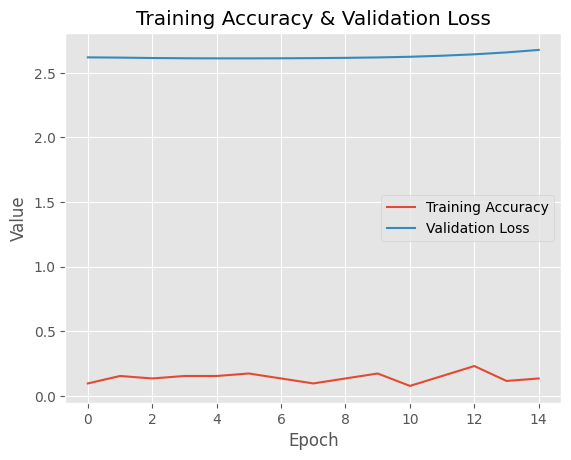

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.title("Training Accuracy & Validation Loss")
plt.legend()
plt.show()

## Convert SavedModel

In [ ]:
!rm -rf '/content/saved_model' '/content/model.h5' '/content/model.keras'
!rm -rf '/content/tfjs_saved_model' '/content/tfjs_keras_model'
!rm -rf '/content/tfjs_saved_model.zip' '/content/tfjs_keras_model.zip'

In [ ]:
# Simpan dengan signature yang sudah diberi nama output
tf.saved_model.save(model, 'saved_model')

In [ ]:
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.33.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
db-dtypes 1.4.3 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


In [ ]:
!tensorflowjs_converter \
    --input_format=tf_saved_model \
    --output_format=tfjs_graph_model \
    --signature_name=serving_default \
    --saved_model_tags=serve \
    saved_model \
    tfjs_saved_model

2025-06-03 11:52:36.365452: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748951556.419870   30678 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748951556.435321   30678 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
2025-06-03 11:53:00.935801: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
I0000 00:00:1748951581.070600   30678 devices.cc:67] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
I0000 00:00

In [ ]:
new_model = tf.saved_model.load('saved_model')
serving_fn = new_model.signatures['serving_default']
print("Output shapes:", serving_fn.structured_outputs)

Output shapes: {'output_0': TensorSpec(shape=(32, 10), dtype=tf.float32, name='output_0')}


In [ ]:
import os
import zipfile
from google.colab import files  # Mengimpor dengan benar

# Path ke folder yang ingin diunduh
source_folder = "/content/tfjs_saved_model"

# Nama file zip yang akan dibuat
zip_filename = "tfjs_saved_model.zip"

# Memeriksa apakah folder sumber ada
if not os.path.exists(source_folder):
    print(f"Folder {source_folder} tidak ditemukan!")
else:
    # Membuat file zip dari folder
    with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, dirs, files_list in os.walk(source_folder):  # Mengubah nama variabel menjadi files_list
            for file in files_list:  # Menggunakan files_list
                file_path = os.path.join(root, file)
                # Mendapatkan path relatif untuk struktur folder di dalam zip
                arcname = os.path.relpath(file_path, os.path.dirname(source_folder))
                zipf.write(file_path, arcname)

    # Mengunduh file zip ke lokal
    files.download(zip_filename)  # Ini sekarang mengacu pada google.colab.files
    print(f"File {zip_filename} telah dibuat dan diunduh ke komputer lokal Anda")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File tfjs_saved_model.zip telah dibuat dan diunduh ke komputer lokal Anda


## Testing
I have also tested the model in a way to mimic a human interacting with a bot and got positive results. hoever, This was very simple because of the tiny amount of data that i have created. But, the same model can also be used with large amount of data

In [23]:
# testing
import random

while True:
  text_p = []
  prediction_input = input("Kamu: ")

  # removing punctuation and converting to lowercase
  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  text_p.append(prediction_input)

  # tokenizing and padding
  prediction_input = tokenizer.texts_to_sequences(text_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input], max_length)

  print(prediction_input)

  # getting output from model
  output = model.predict(prediction_input)

  # tiap kelas
  print("\nprediksi tiap kelas")
  for i, prob in enumerate(output[0]):
    class_name = le.inverse_transform([i])[0]
    print(f"{class_name}: {prob:.4f}")

  output = output.argmax()

  # finding the right tag and predicting
  response_tag = le.inverse_transform([output])[0]
  print("Soekarno: ",random.choice(responses[response_tag]))
  if response_tag == "goodbye":
    break

Kamu: halo pak
[[ 0  0 59 30]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step

prediksi tiap kelas


NameError: name 'le' is not defined